In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext(master="local[4]")

In [2]:
import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0
                       for i in range(TOTAL)]) \
         .cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())
print(dots.take(5))

Number of random points: 1000000
Mean: [-3.08942669e-04 -6.21335243e-05]
stdev: [0.57755921 0.57713799]
[array([0.27884227, 0.92298525]), array([ 0.49370156, -0.76820063]), array([0.29948849, 0.42317416]), array([-0.47861802, -0.86888103]), array([-0.32347756, -0.48783719])]


In [3]:
from operator import itemgetter

# x.itemgetter(a) - fetches value at location a, assuming x is just an iterable (e.g. list)
# sample.map(itemgetter(a)) - returns a new RDD object by applying itemgetter(a) to every element in sample
# sample.map(itemgetter(a)).collect() - Takes the RDD object and returns it as a python list
type(dots.map(itemgetter(0)))

pyspark.rdd.PipelinedRDD

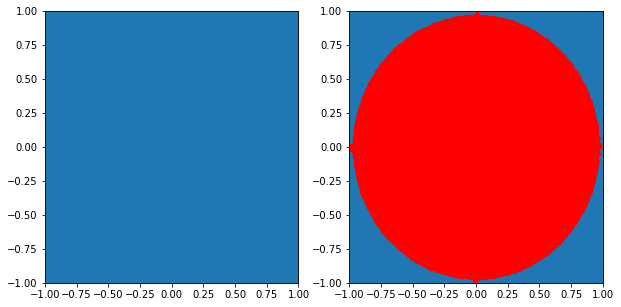

In [4]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.1)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout)

In [5]:
pi = 4.0 * (dots.filter(inCircle).count()*1.0 / TOTAL)
print("The estimation of \pi is:", pi)

The estimation of \pi is: 3.141156


In [6]:
# Simple operations on plain RDDs
print(sc.parallelize(range(4)).collect()) # Get original RDD back
print(sc.parallelize(range(4)).count())   # Count the number of elements in an RDD
A = sc.parallelize(range(10000))              # Define a function that generates an RDD
A.reduce(lambda x, y: x+y)                # Use a reduce operation to sum of values of that RDD one at a time.  

[0, 1, 2, 3]
4


49995000

In [27]:
# Examples of (key, value) RDDs
database = sc.parallelize([
    (55632, {'name': 'yoav',  'city': 'jerusalem'} )
    ,(3342, {'name': 'homer', 'town': 'springfield'})])
print(database)
print(database.collect())

print("")
A = sc.parallelize(range(4)).map(lambda x: (x, x*x))
print(A)
print(A.collect())

print("")
A = sc.parallelize([(1,3),(4,100),(1,-5),(3,2)])
print(A)
A = A.reduceByKey(lambda x,y: x*y)
print (A)
print(A.collect())

# Should really be doing this with an iterator
A = sc.parallelize(xrange(1000000))

ParallelCollectionRDD[83] at parallelize at PythonRDD.scala:184
[(55632, {'name': 'yoav', 'city': 'jerusalem'}), (3342, {'name': 'homer', 'town': 'springfield'})]

PythonRDD[85] at RDD at PythonRDD.scala:49
[(0, 0), (1, 1), (2, 4), (3, 9)]

ParallelCollectionRDD[86] at parallelize at PythonRDD.scala:184
PythonRDD[91] at RDD at PythonRDD.scala:49
[(4, 100), (1, -15), (3, 2)]
